In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt

#from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
heart_attack_df = pd.read_csv(
    "Resources/heart.csv")

# Display DataFrame
heart_attack_df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# Get a brief summary of the heart_attack DataFrame.
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Generate summary statistics
heart_attack_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# check for null values
heart_attack_df.isnull().values.any()


False

In [6]:
# find duplicates and remove duplicates
heart_attack_df.duplicated()
cleaned_heart_attack_df = heart_attack_df.drop_duplicates()
cleaned_heart_attack_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


C:\Users\simpl\AppData\Local\Temp\ipykernel_84\964812446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_heart_attack_df["age"] = pd.cut(cleaned_heart_attack_df["age"], bins=age, labels=labels, include_lowest=True)


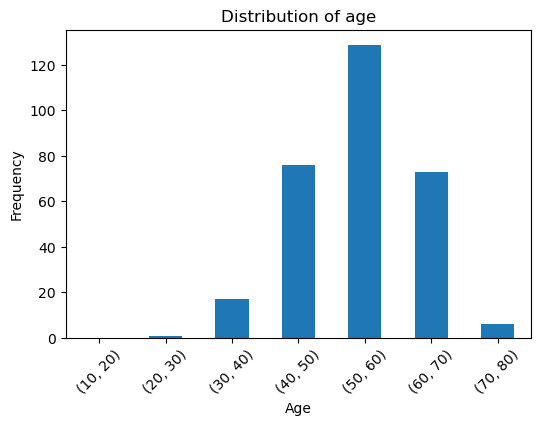

In [7]:
# plot showing distribution of age
age = [10, 20, 30, 40, 50, 60 , 70, 80]
labels = [(10,20), (20,30), (30,40), (40,50), (50,60), (60,70), (70,80)]

cleaned_heart_attack_df["age"] = pd.cut(cleaned_heart_attack_df["age"], bins=age, labels=labels, include_lowest=True)
age_count=cleaned_heart_attack_df["age"].value_counts().sort_index().plot(kind="bar", figsize=(6,4), rot=45)
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Group data by gender for pie chart
gender_count = cleaned_heart_attack_df["sex"].value_counts()
gender_count 

1    206
0     96
Name: sex, dtype: int64

In [9]:
chest_pain_count = cleaned_heart_attack_df["cp"].value_counts()
chest_pain_count

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

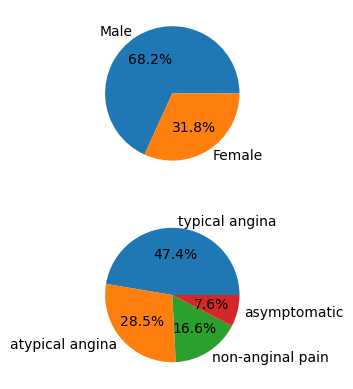

In [12]:
#Create pie chart
fig, (ax1, ax2) = plt.subplots(2)

categories=["Male","Female"]
ax1.pie(gender_count, labels=categories, autopct='%1.1f%%')

categories=["typical angina","atypical angina", "non-anginal pain", "asymptomatic"]
ax2.pie(chest_pain_count, labels=categories, autopct='%1.1f%%')

plt.subplots_adjust(wspace=0.5)
plt.show()